In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.model_selection import SlidingWindowForecastCV

import scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
df1 = pd.ExcelFile("arimaresiduals.xlsx").parse("Sheet1").set_index(['Timestamp']) # Read Excel
df2 = pd.ExcelFile("arimaresiduals2.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df3 = pd.ExcelFile("arimaresiduals3.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df4 = pd.ExcelFile("arimaresiduals4.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df5 = pd.ExcelFile("arimaresiduals5.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df6 = pd.ExcelFile("arimaresiduals6.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df7 = pd.ExcelFile("arimaresiduals7.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df8 = pd.ExcelFile("arimaresiduals8.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df9 = pd.ExcelFile("arimaresiduals9.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df10 = pd.ExcelFile("arimaresiduals10.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df11 = pd.ExcelFile("arimaresiduals11.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df12 = pd.ExcelFile("arimaresiduals12.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df13 = pd.ExcelFile("arimaresiduals13.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df14 = pd.ExcelFile("arimaresiduals14.xlsx").parse("Sheet1").set_index(['Timestamp']) 
df15 = pd.ExcelFile("arimaresiduals15.xlsx").parse("Sheet1").set_index(['Timestamp']) 




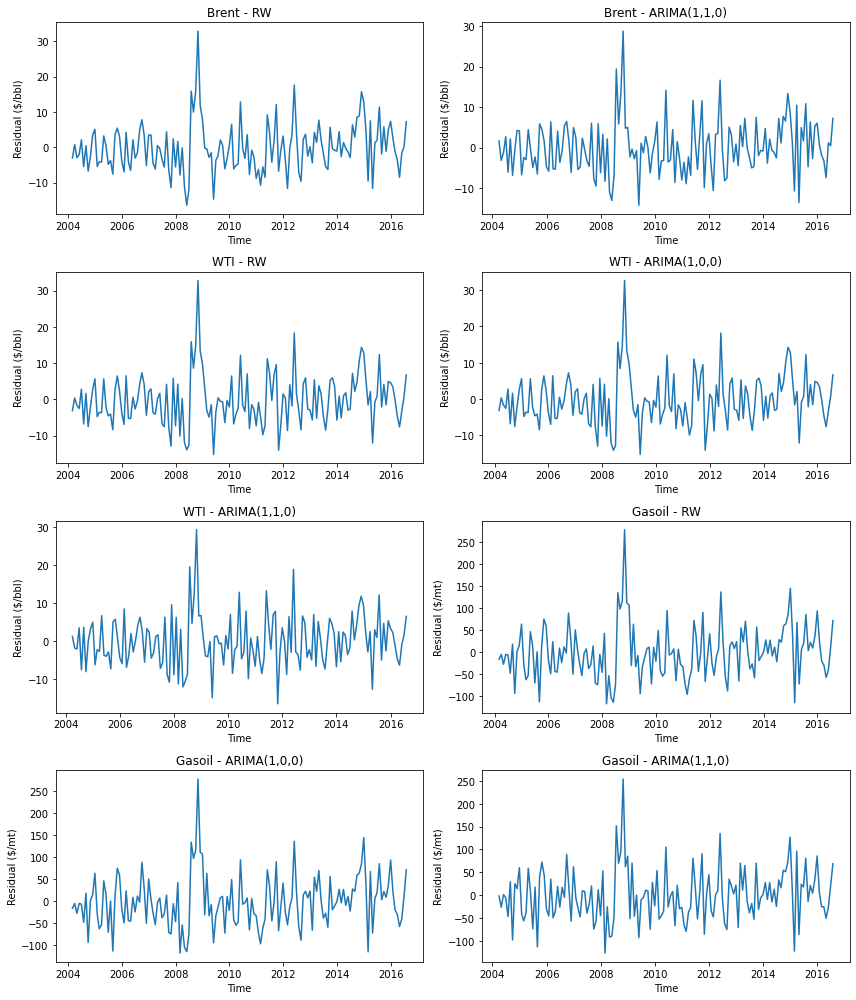

In [3]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

axis[0,0].plot(df1[["Brent1"]])
axis[0,0].set_title("Brent - RW")
axis[0,0].set_xlabel("Time")
axis[0,0].set_ylabel("Residual ($/bbl)")

axis[0,1].plot(df2[["Brent2"]])
axis[0,1].set_title("Brent - ARIMA(1,1,0)")
axis[0,1].set_xlabel("Time")
axis[0,1].set_ylabel("Residual ($/bbl)")

axis[1,0].plot(df3[["WTI1"]])
axis[1,0].set_title("WTI - RW")
axis[1,0].set_xlabel("Time")
axis[1,0].set_ylabel("Residual ($/bbl)")

axis[1,1].plot(df4[["WTI2"]])
axis[1,1].set_title("WTI - ARIMA(1,0,0)")
axis[1,1].set_xlabel("Time")
axis[1,1].set_ylabel("Residual ($/bbl)")

axis[2,0].plot(df5[["WTI3"]])
axis[2,0].set_title("WTI - ARIMA(1,1,0)")
axis[2,0].set_xlabel("Time")
axis[2,0].set_ylabel("Residual ($/bbl)")

axis[2,1].plot(df6[["Gasoil1"]])
axis[2,1].set_title("Gasoil - RW")
axis[2,1].set_xlabel("Time")
axis[2,1].set_ylabel("Residual ($/mt)")

axis[3,0].plot(df7[["Gasoil2"]])
axis[3,0].set_title("Gasoil - ARIMA(1,0,0)")
axis[3,0].set_xlabel("Time")
axis[3,0].set_ylabel("Residual ($/mt)")

axis[3,1].plot(df8[["Gasoil3"]])
axis[3,1].set_title("Gasoil - ARIMA(1,1,0)")
axis[3,1].set_xlabel("Time")
axis[3,1].set_ylabel("Residual ($/mt)")



figure.tight_layout()
plt.show()

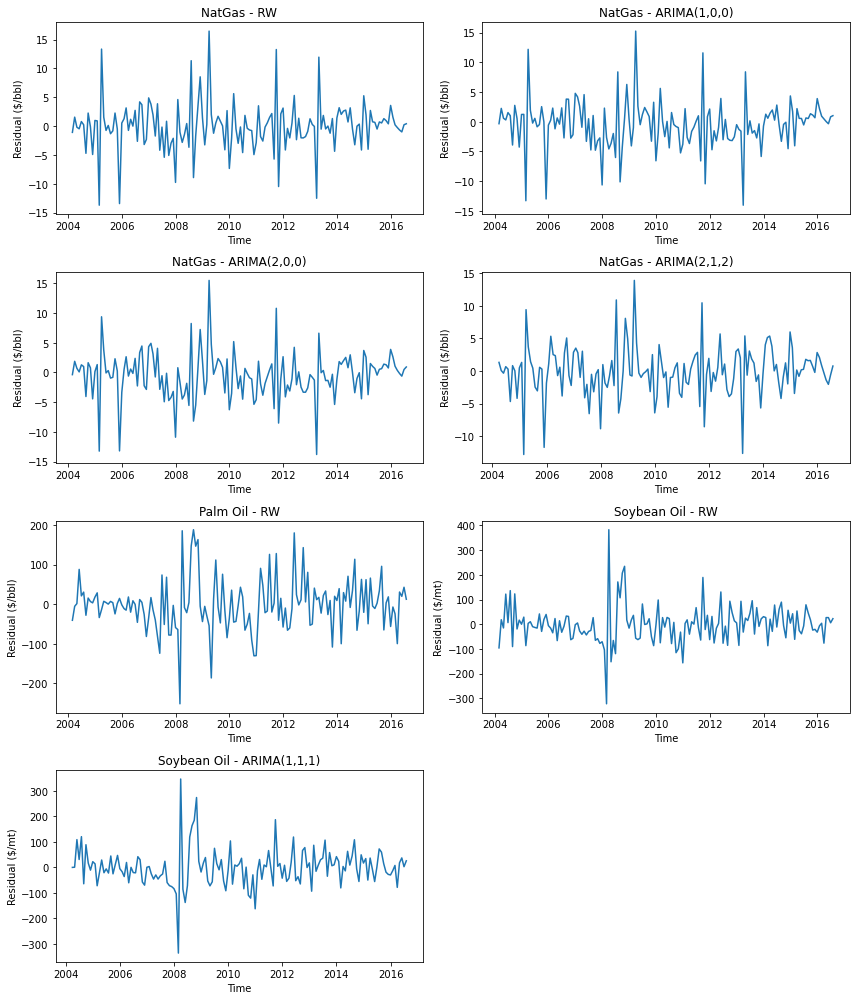

In [4]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

axis[0,0].plot(df9[["TTF1"]])
axis[0,0].set_title("NatGas - RW")
axis[0,0].set_xlabel("Time")
axis[0,0].set_ylabel("Residual ($/bbl)")

axis[0,1].plot(df10[["TTF2"]])
axis[0,1].set_title("NatGas - ARIMA(1,0,0)")
axis[0,1].set_xlabel("Time")
axis[0,1].set_ylabel("Residual ($/bbl)")

axis[1,0].plot(df11[["TTF3"]])
axis[1,0].set_title("NatGas - ARIMA(2,0,0)")
axis[1,0].set_xlabel("Time")
axis[1,0].set_ylabel("Residual ($/bbl)")

axis[1,1].plot(df12[["TTF4"]])
axis[1,1].set_title("NatGas - ARIMA(2,1,2)")
axis[1,1].set_xlabel("Time")
axis[1,1].set_ylabel("Residual ($/bbl)")

axis[2,0].plot(df13[["FCPO"]])
axis[2,0].set_title("Palm Oil - RW")
axis[2,0].set_xlabel("Time")
axis[2,0].set_ylabel("Residual ($/bbl)")

axis[2,1].plot(df14[["SBO1"]])
axis[2,1].set_title("Soybean Oil - RW")
axis[2,1].set_xlabel("Time")
axis[2,1].set_ylabel("Residual ($/mt)")

axis[3,0].plot(df15[["SBO2"]])
axis[3,0].set_title("Soybean Oil - ARIMA(1,1,1)")
axis[3,0].set_xlabel("Time")
axis[3,0].set_ylabel("Residual ($/mt)")

figure.delaxes(axis[3][1])


figure.tight_layout()
plt.show()

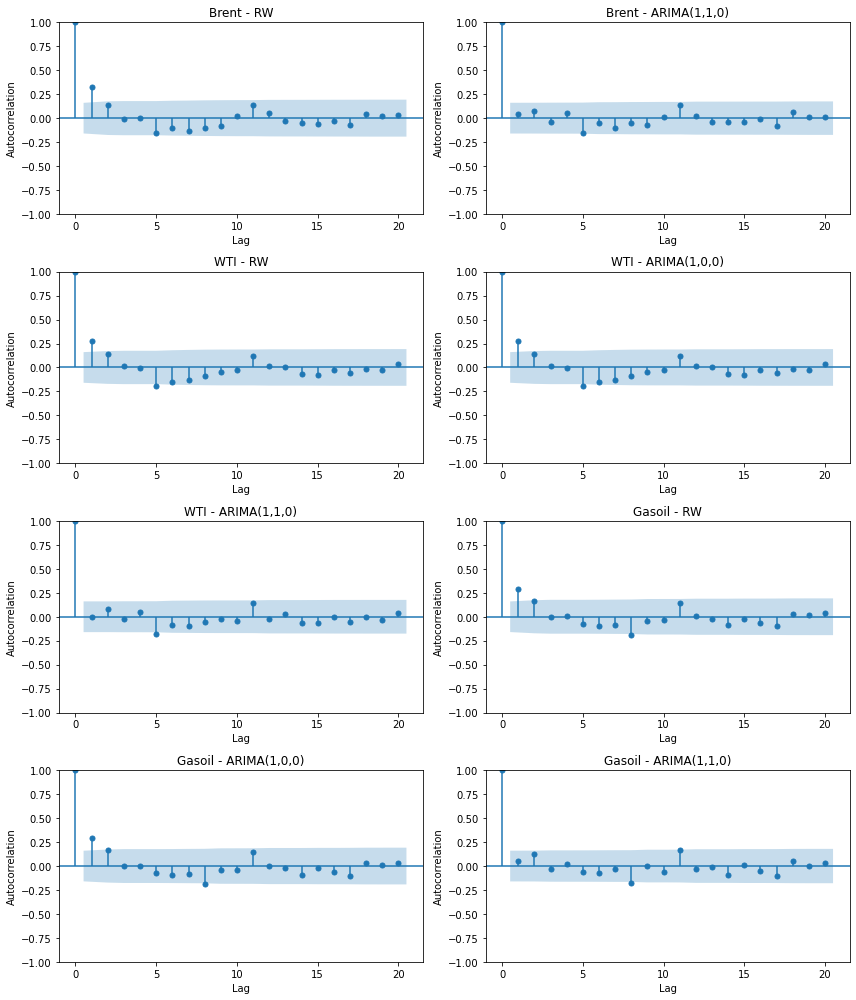

In [5]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

plot_acf(df1[["Brent1"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("Brent - RW")
axis[0,0].set_xlabel("Lag")
axis[0,0].set_ylabel("Autocorrelation")

plot_acf(df2[["Brent2"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("Brent - ARIMA(1,1,0)")
axis[0,1].set_xlabel("Lag")
axis[0,1].set_ylabel("Autocorrelation")

plot_acf(df3[["WTI1"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("WTI - RW")
axis[1,0].set_xlabel("Lag")
axis[1,0].set_ylabel("Autocorrelation")

plot_acf(df4[["WTI2"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("WTI - ARIMA(1,0,0)")
axis[1,1].set_xlabel("Lag")
axis[1,1].set_ylabel("Autocorrelation")

plot_acf(df5[["WTI3"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("WTI - ARIMA(1,1,0)")
axis[2,0].set_xlabel("Lag")
axis[2,0].set_ylabel("Autocorrelation")

plot_acf(df6[["Gasoil1"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("Gasoil - RW")
axis[2,1].set_xlabel("Lag")
axis[2,1].set_ylabel("Autocorrelation")

plot_acf(df7[["Gasoil2"]], lags = 20, ax=axis[3,0])
axis[3,0].set_title("Gasoil - ARIMA(1,0,0)")
axis[3,0].set_xlabel("Lag")
axis[3,0].set_ylabel("Autocorrelation")

plot_acf(df8[["Gasoil3"]], lags = 20, ax=axis[3,1])
axis[3,1].set_title("Gasoil - ARIMA(1,1,0)")
axis[3,1].set_xlabel("Lag")
axis[3,1].set_ylabel("Autocorrelation")

figure.tight_layout()
plt.show()

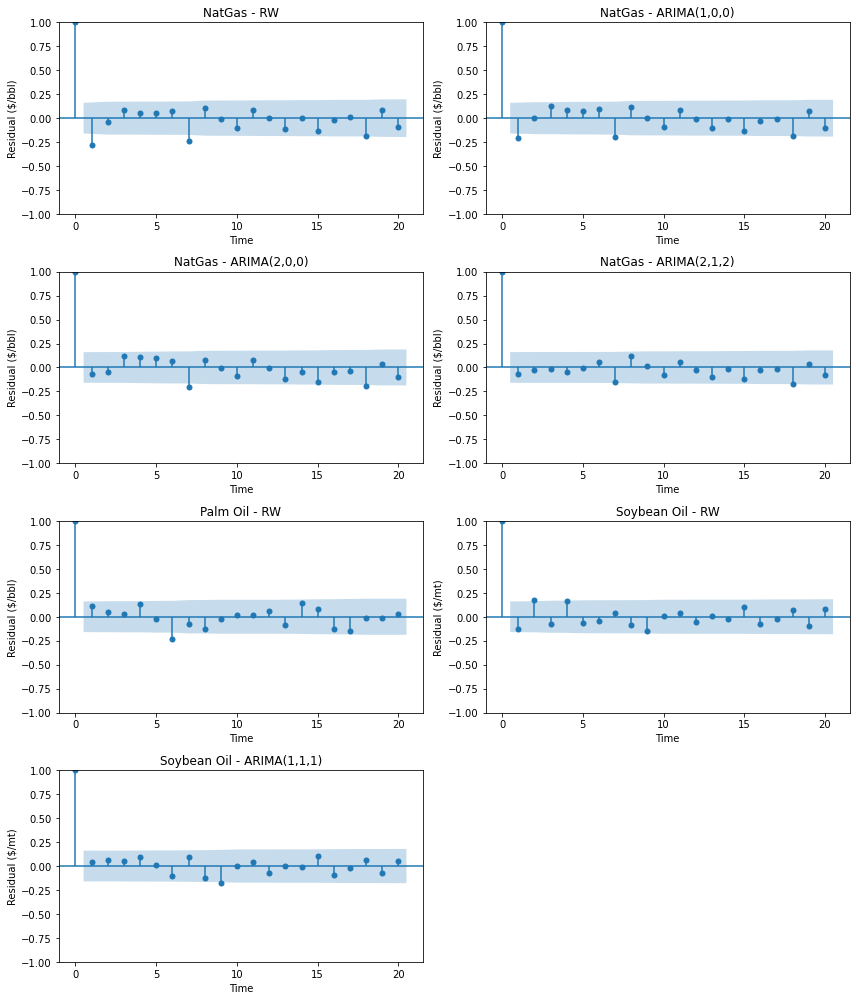

In [6]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

plot_acf(df9[["TTF1"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("NatGas - RW")
axis[0,0].set_xlabel("Time")
axis[0,0].set_ylabel("Residual ($/bbl)")

plot_acf(df10[["TTF2"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("NatGas - ARIMA(1,0,0)")
axis[0,1].set_xlabel("Time")
axis[0,1].set_ylabel("Residual ($/bbl)")

plot_acf(df11[["TTF3"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("NatGas - ARIMA(2,0,0)")
axis[1,0].set_xlabel("Time")
axis[1,0].set_ylabel("Residual ($/bbl)")

plot_acf(df12[["TTF4"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("NatGas - ARIMA(2,1,2)")
axis[1,1].set_xlabel("Time")
axis[1,1].set_ylabel("Residual ($/bbl)")

plot_acf(df13[["FCPO"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("Palm Oil - RW")
axis[2,0].set_xlabel("Time")
axis[2,0].set_ylabel("Residual ($/bbl)")

plot_acf(df14[["SBO1"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("Soybean Oil - RW")
axis[2,1].set_xlabel("Time")
axis[2,1].set_ylabel("Residual ($/mt)")

plot_acf(df15[["SBO2"]], lags = 20, ax=axis[3,0])
axis[3,0].set_title("Soybean Oil - ARIMA(1,1,1)")
axis[3,0].set_xlabel("Time")
axis[3,0].set_ylabel("Residual ($/mt)")

figure.delaxes(axis[3][1])


figure.tight_layout()
plt.show()

In [7]:
print(np.mean(df1))
print(np.mean(df2))
print(np.mean(df3))
print(np.mean(df4))
print(np.mean(df5))
print(np.mean(df6))
print(np.mean(df7))
print(np.mean(df8))
print(np.mean(df9))
print(np.mean(df10))
print(np.mean(df11))
print(np.mean(df12))
print(np.mean(df13))
print(np.mean(df14))
print(np.mean(df15))

Brent1   -0.088533
dtype: float64
Brent2    0.074893
dtype: float64
WTI1   -0.057
dtype: float64
WTI2   -0.167008
dtype: float64
WTI3    0.094908
dtype: float64
Gasoil1   -0.751667
dtype: float64
Gasoil2   -1.339485
dtype: float64
Gasoil3    0.318391
dtype: float64
TTF1   -0.012394
dtype: float64
TTF2   -0.451723
dtype: float64
TTF3   -0.460329
dtype: float64
TTF4   -0.017264
dtype: float64
FCPO   -0.722646
dtype: float64
SBO1   -0.072946
dtype: float64
SBO2    0.352576
dtype: float64


In [8]:
t_statistic, p_value = stats.ttest_1samp(a=df1, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df2, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df3, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df4, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df5, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df6, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df7, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df8, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)



[-0.15756315] [0.87501437]
[0.13922572] [0.88946106]
[-0.09998911] [0.92048738]
[-0.29324973] [0.76973931]
[0.17128897] [0.86423052]
[-0.15484918] [0.87714978]
[-0.27609972] [0.78285405]
[0.0676806] [0.94613125]


In [9]:
t_statistic, p_value = stats.ttest_1samp(a=df9, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df10, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df11, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df12, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df13, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df14, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

t_statistic, p_value = stats.ttest_1samp(a=df15, popmean=0, alternative='two-sided') ### one tailed test?
print(t_statistic , p_value)

[-0.03594394] [0.97137517]
[-1.35986949] [0.17592535]
[-1.42411526] [0.156504]
[-0.05458692] [0.95654118]
[-0.13546741] [0.89242517]
[-0.01171015] [0.99067253]
[0.05780075] [0.95398531]


In [10]:
print(sm.stats.acorr_ljungbox(df1, lags=[6]))
print(sm.stats.acorr_ljungbox(df2, lags=[6]))
print(sm.stats.acorr_ljungbox(df3, lags=[6]))
print(sm.stats.acorr_ljungbox(df4, lags=[6]))
print(sm.stats.acorr_ljungbox(df5, lags=[6]))
print(sm.stats.acorr_ljungbox(df6, lags=[6]))


     lb_stat  lb_pvalue
6  24.401111   0.000441
    lb_stat  lb_pvalue
6  6.186183    0.40266
     lb_stat  lb_pvalue
6  24.131837   0.000494
     lb_stat  lb_pvalue
6  24.121977   0.000496
    lb_stat  lb_pvalue
6  8.153678   0.227059
     lb_stat  lb_pvalue
6  19.413533   0.003519


In [11]:
print(sm.stats.acorr_ljungbox(df7, lags=[6]))
print(sm.stats.acorr_ljungbox(df8, lags=[6]))
print(sm.stats.acorr_ljungbox(df9, lags=[6]))
print(sm.stats.acorr_ljungbox(df10, lags=[6]))
print(sm.stats.acorr_ljungbox(df11, lags=[6]))
print(sm.stats.acorr_ljungbox(df12, lags=[6]))
print(sm.stats.acorr_ljungbox(df13, lags=[6]))
print(sm.stats.acorr_ljungbox(df14, lags=[6]))
print(sm.stats.acorr_ljungbox(df15, lags=[6]))

     lb_stat  lb_pvalue
6  19.397267   0.003543
    lb_stat  lb_pvalue
6  4.769236   0.573733
     lb_stat  lb_pvalue
6  14.848352    0.02147
     lb_stat  lb_pvalue
6  12.779109   0.046681
    lb_stat  lb_pvalue
6  7.586001   0.270029
    lb_stat  lb_pvalue
6  1.762148   0.940223
     lb_stat  lb_pvalue
6  14.510556   0.024425
     lb_stat  lb_pvalue
6  13.203293   0.039919
    lb_stat  lb_pvalue
6  4.438698    0.61753


In [12]:
### Calculate squared residuals ###

sqr1 = df1[["Brent1"]]**2
sqr2 = df2[["Brent2"]]**2
sqr3 = df3[["WTI1"]]**2
sqr4 = df4[["WTI2"]]**2
sqr5 = df5[["WTI3"]]**2
sqr6 = df6[["Gasoil1"]]**2
sqr7 = df7[["Gasoil2"]]**2
sqr8 = df8[["Gasoil3"]]**2
sqr9 = df9[["TTF1"]]**2
sqr10 = df10[["TTF2"]]**2
sqr11 = df11[["TTF3"]]**2
sqr12= df12[["TTF4"]]**2
sqr13 = df13[["FCPO"]]**2
sqr14 = df14[["SBO1"]]**2
sqr15 = df15[["SBO2"]]**2

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmode

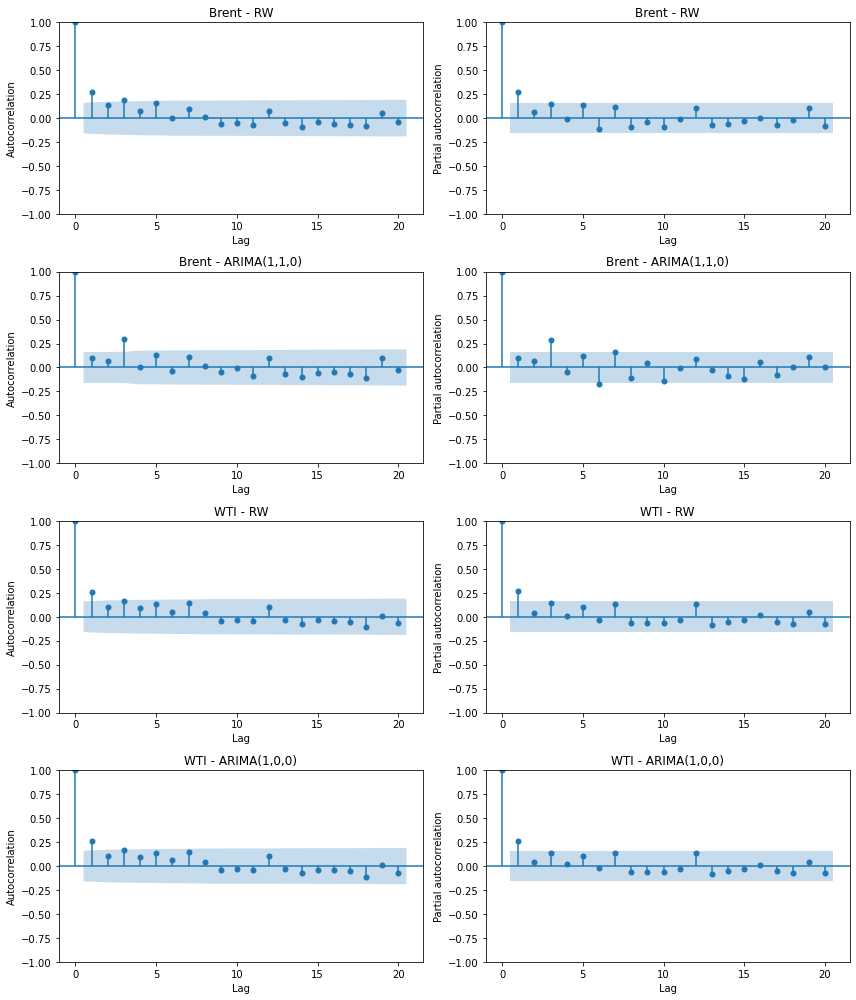

In [13]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

plot_acf(sqr1[["Brent1"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("Brent - RW")
axis[0,0].set_xlabel("Lag")
axis[0,0].set_ylabel("Autocorrelation")

plot_pacf(sqr1[["Brent1"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("Brent - RW")
axis[0,1].set_xlabel("Lag")
axis[0,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr2[["Brent2"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("Brent - ARIMA(1,1,0)")
axis[1,0].set_xlabel("Lag")
axis[1,0].set_ylabel("Autocorrelation")

plot_pacf(sqr2[["Brent2"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("Brent - ARIMA(1,1,0)")
axis[1,1].set_xlabel("Lag")
axis[1,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr3[["WTI1"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("WTI - RW")
axis[2,0].set_xlabel("Lag")
axis[2,0].set_ylabel("Autocorrelation")

plot_pacf(sqr3[["WTI1"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("WTI - RW")
axis[2,1].set_xlabel("Lag")
axis[2,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr4[["WTI2"]], lags = 20, ax=axis[3,0])
axis[3,0].set_title("WTI - ARIMA(1,0,0)")
axis[3,0].set_xlabel("Lag")
axis[3,0].set_ylabel("Autocorrelation")

plot_pacf(sqr4[["WTI2"]], lags = 20, ax=axis[3,1])
axis[3,1].set_title("WTI - ARIMA(1,0,0)")
axis[3,1].set_xlabel("Lag")
axis[3,1].set_ylabel("Partial autocorrelation")

figure.tight_layout()
plt.show()

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmode

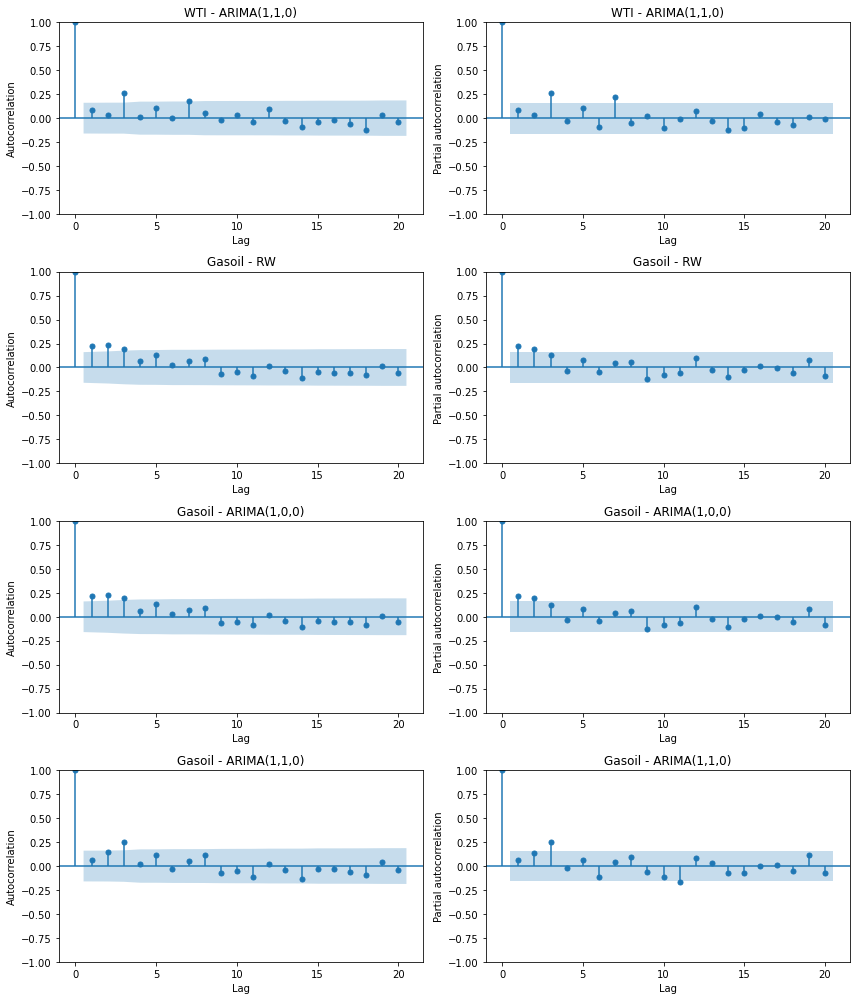

In [14]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

plot_acf(sqr5[["WTI3"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("WTI - ARIMA(1,1,0)")
axis[0,0].set_xlabel("Lag")
axis[0,0].set_ylabel("Autocorrelation")

plot_pacf(sqr5[["WTI3"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("WTI - ARIMA(1,1,0)")
axis[0,1].set_xlabel("Lag")
axis[0,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr6[["Gasoil1"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("Gasoil - RW")
axis[1,0].set_xlabel("Lag")
axis[1,0].set_ylabel("Autocorrelation")

plot_pacf(sqr6[["Gasoil1"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("Gasoil - RW")
axis[1,1].set_xlabel("Lag")
axis[1,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr7[["Gasoil2"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("Gasoil - ARIMA(1,0,0)")
axis[2,0].set_xlabel("Lag")
axis[2,0].set_ylabel("Autocorrelation")

plot_pacf(sqr7[["Gasoil2"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("Gasoil - ARIMA(1,0,0)")
axis[2,1].set_xlabel("Lag")
axis[2,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr8[["Gasoil3"]], lags = 20, ax=axis[3,0])
axis[3,0].set_title("Gasoil - ARIMA(1,1,0)")
axis[3,0].set_xlabel("Lag")
axis[3,0].set_ylabel("Autocorrelation")

plot_pacf(sqr8[["Gasoil3"]], lags = 20, ax=axis[3,1])
axis[3,1].set_title("Gasoil - ARIMA(1,1,0)")
axis[3,1].set_xlabel("Lag")
axis[3,1].set_ylabel("Partial autocorrelation")

figure.tight_layout()
plt.show()

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmode

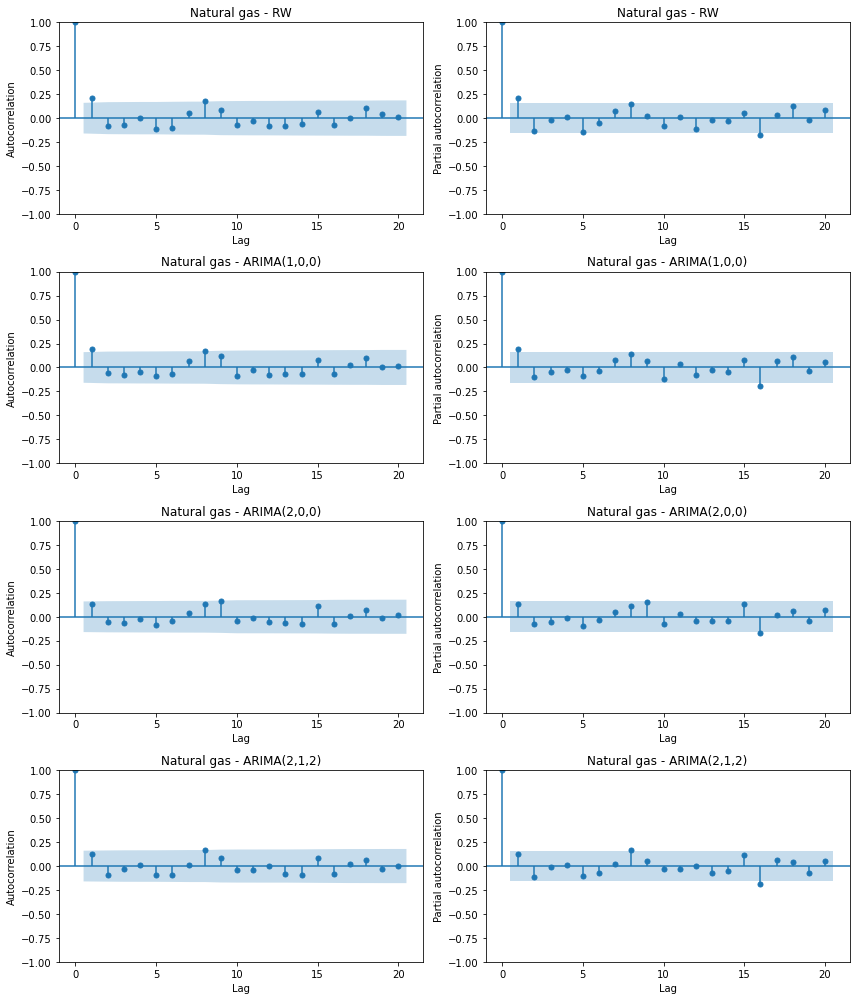

In [15]:
figure, axis = plt.subplots(4, 2, figsize=(12, 14))

plot_acf(sqr9[["TTF1"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("Natural gas - RW")
axis[0,0].set_xlabel("Lag")
axis[0,0].set_ylabel("Autocorrelation")

plot_pacf(sqr9[["TTF1"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("Natural gas - RW")
axis[0,1].set_xlabel("Lag")
axis[0,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr10[["TTF2"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("Natural gas - ARIMA(1,0,0)")
axis[1,0].set_xlabel("Lag")
axis[1,0].set_ylabel("Autocorrelation")

plot_pacf(sqr10[["TTF2"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("Natural gas - ARIMA(1,0,0)")
axis[1,1].set_xlabel("Lag")
axis[1,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr11[["TTF3"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("Natural gas - ARIMA(2,0,0)")
axis[2,0].set_xlabel("Lag")
axis[2,0].set_ylabel("Autocorrelation")

plot_pacf(sqr11[["TTF3"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("Natural gas - ARIMA(2,0,0)")
axis[2,1].set_xlabel("Lag")
axis[2,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr12[["TTF4"]], lags = 20, ax=axis[3,0])
axis[3,0].set_title("Natural gas - ARIMA(2,1,2)")
axis[3,0].set_xlabel("Lag")
axis[3,0].set_ylabel("Autocorrelation")

plot_pacf(sqr12[["TTF4"]], lags = 20, ax=axis[3,1])
axis[3,1].set_title("Natural gas - ARIMA(2,1,2)")
axis[3,1].set_xlabel("Lag")
axis[3,1].set_ylabel("Partial autocorrelation")

figure.tight_layout()
plt.show()

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


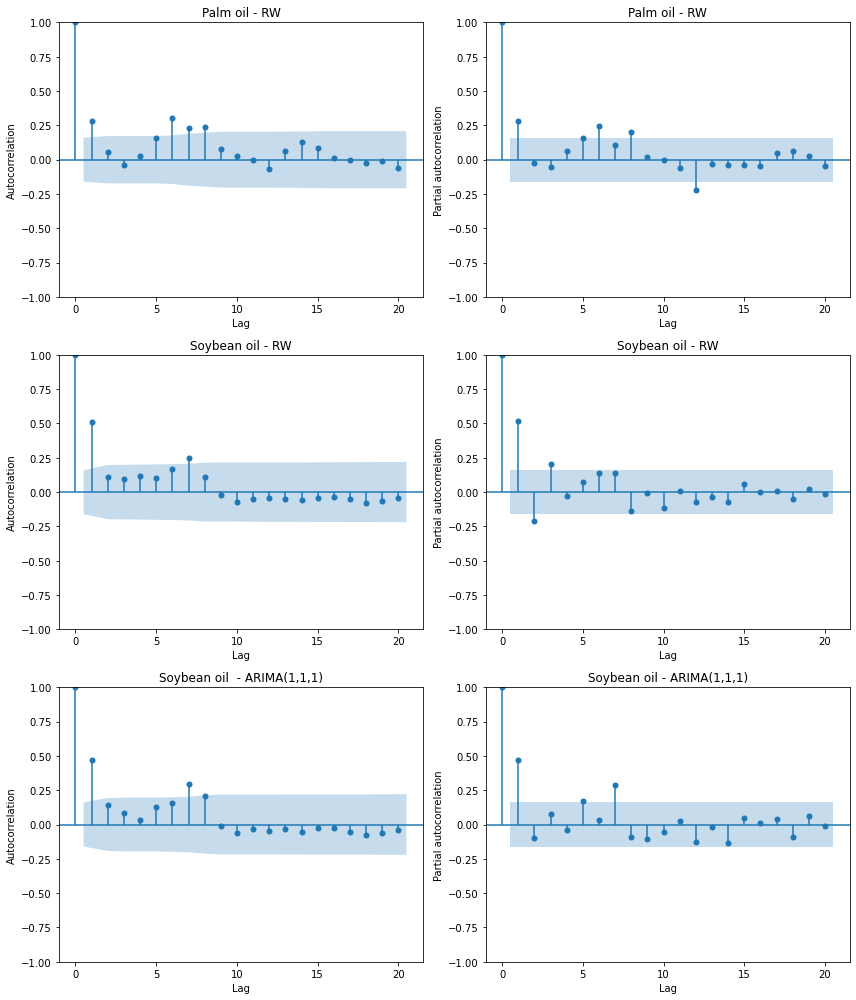

In [16]:
figure, axis = plt.subplots(3, 2, figsize=(12, 14))

plot_acf(sqr13[["FCPO"]], lags = 20, ax=axis[0,0])
axis[0,0].set_title("Palm oil - RW")
axis[0,0].set_xlabel("Lag")
axis[0,0].set_ylabel("Autocorrelation")

plot_pacf(sqr13[["FCPO"]], lags = 20, ax=axis[0,1])
axis[0,1].set_title("Palm oil - RW")
axis[0,1].set_xlabel("Lag")
axis[0,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr14[["SBO1"]], lags = 20, ax=axis[1,0])
axis[1,0].set_title("Soybean oil - RW")
axis[1,0].set_xlabel("Lag")
axis[1,0].set_ylabel("Autocorrelation")

plot_pacf(sqr14[["SBO1"]], lags = 20, ax=axis[1,1])
axis[1,1].set_title("Soybean oil - RW")
axis[1,1].set_xlabel("Lag")
axis[1,1].set_ylabel("Partial autocorrelation")

plot_acf(sqr15[["SBO2"]], lags = 20, ax=axis[2,0])
axis[2,0].set_title("Soybean oil  - ARIMA(1,1,1)")
axis[2,0].set_xlabel("Lag")
axis[2,0].set_ylabel("Autocorrelation")

plot_pacf(sqr15[["SBO2"]], lags = 20, ax=axis[2,1])
axis[2,1].set_title("Soybean oil - ARIMA(1,1,1)")
axis[2,1].set_xlabel("Lag")
axis[2,1].set_ylabel("Partial autocorrelation")

figure.tight_layout()
plt.show()

c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


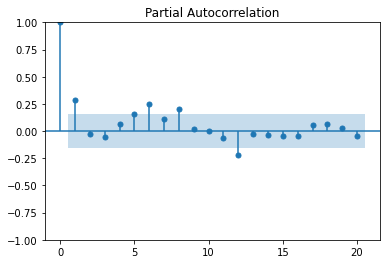

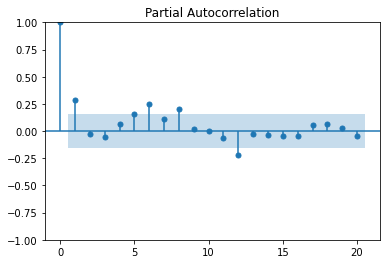

In [17]:
plot_pacf(df13[["FCPO"]]**2, lags = 20)